# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data = datasets.MNIST(root='./data', train=True, transform=trans, download= True)
train_loader = torch.utils.data.DataLoader(train_data, 32, shuffle = True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = datasets.MNIST(root='./data', train=True, transform=trans, download=True)
test_loader = torch.utils.data.DataLoader(test_data, 32, shuffle = True)
# Creating a validation set and defining a validation loader. Created the same, if I am required to have a validation loop in the future.
## MY CODE HERE ##
val_data = datasets.MNIST(root='./data', train=True, transform=trans, download=True)
val_loader = torch.utils.data.DataLoader(val_data, 32, shuffle = True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I converted the image to a Pytorch tensor, and then normalised  the the pixel values to have a mean of 0.5 and standard deviation of 0.5.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

---showing images from train loader---
7


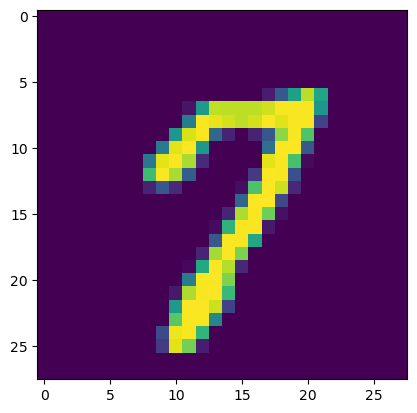

4


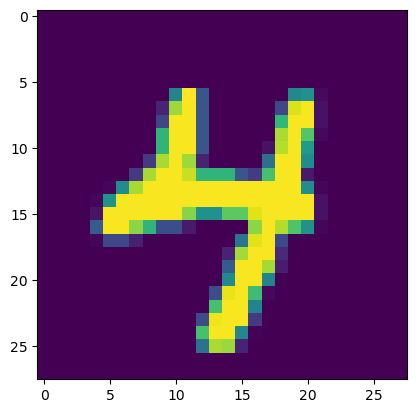

6


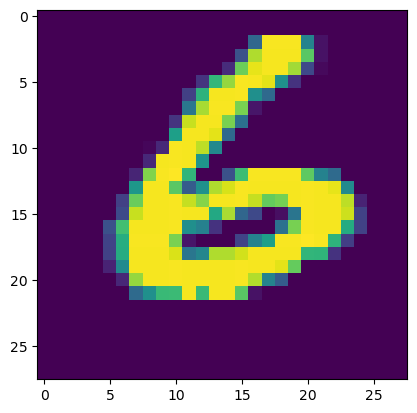

0


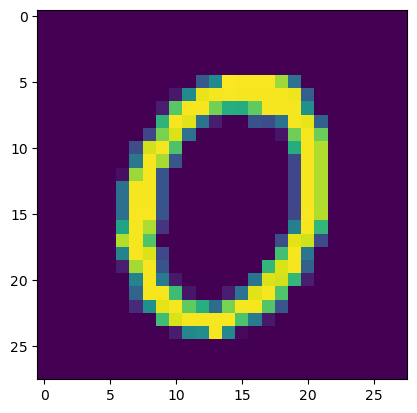

1


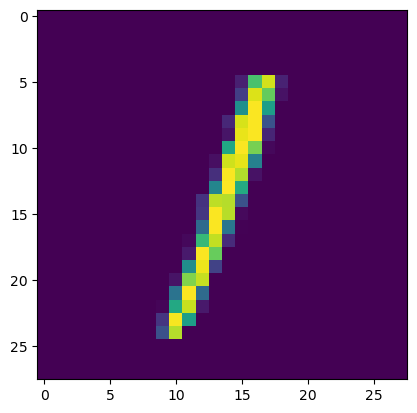

---showing images from test loader---
6


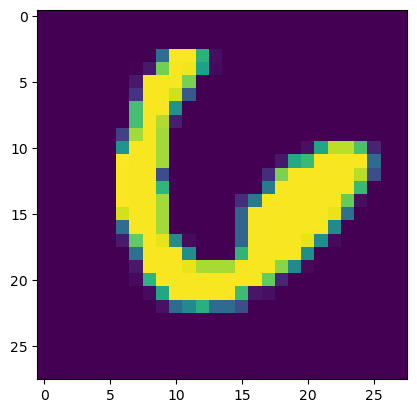

3


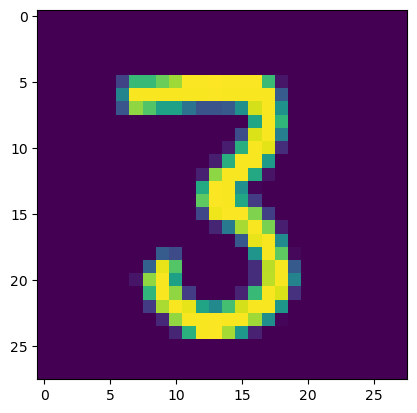

6


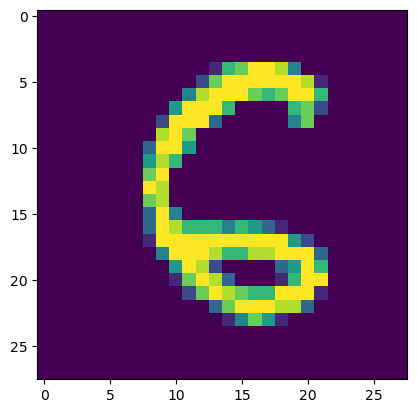

0


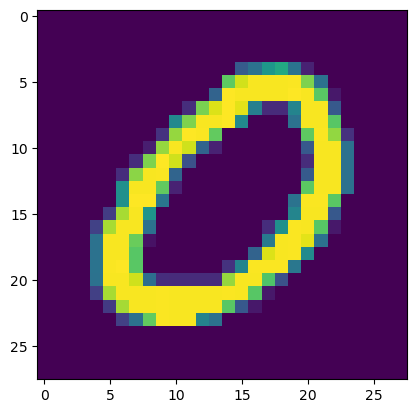

9


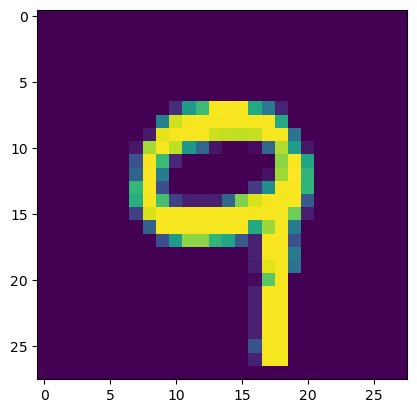

---showing images from val loader---
3


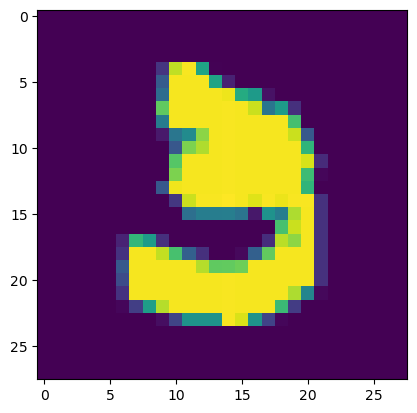

4


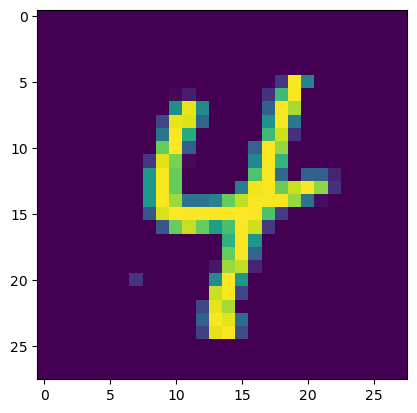

7


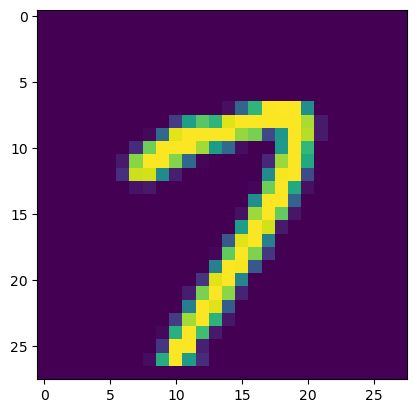

0


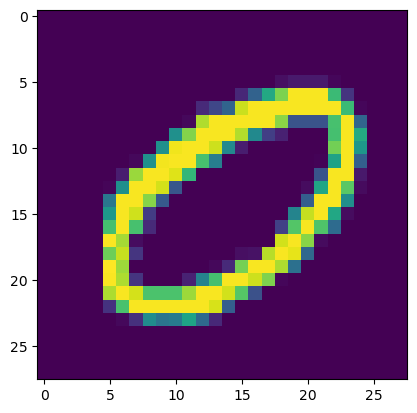

4


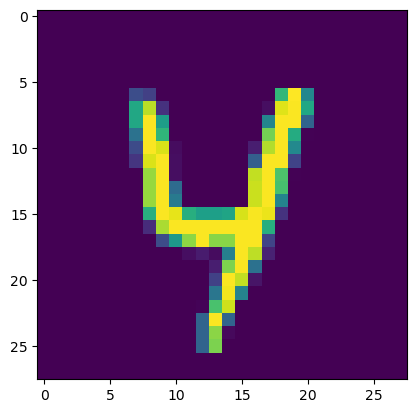

cuda


In [6]:
# Explore data
## YOUR CODE HERE ##
print('---showing images from train loader---')
show5(train_loader)

print('---showing images from test loader---')
show5(test_loader)

print('---showing images from val loader---')
show5(val_loader)

if torch.cuda.is_available():
    print('cuda')
    
else:
    print('cpu')

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.features=nn.Sequential(nn.Linear(784, 256),
                                    #nn.Dropout(0.4),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                                    #nn.Dropout(0.4),
                      nn.ReLU(),
                      nn.Linear(128,128),
                                    #nn.Dropout(0.4),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      nn.LogSoftmax(dim=1))
    def forward(self, x):
        x = x.view(x.size(0), -1)
        #x=torch.flatten(x)
        x=self.features(x)
        return x
#I commented out the dropout, since they had actually been reducing the model's accuracy instead of increasing the same.

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
criterion = nn.NLLLoss() #I am using an Negative Loss Likelihood Loss function. I am using the same, since I am confortable doing so from the AI programming with Python Nanodegree.
model = NNet()
optimizer = optim.Adam(model.parameters(), 0.001)
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [24]:
## YOUR CODE HERE ##
def train():
    model.train() #setting the model to training mode.
    model.to(device)
    loss_history = [] #list for keeping in the values to plot the graph for the training loss.
    loss_per_epoch = 0
    print_every = 250
    for epoch in range(10):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            log_ps = model.forward(images)
            loss = criterion(log_ps, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            #loss_per_epoch = running_loss/
            loss_history.append(running_loss)
            
            if (i+1) % print_every == 0:
                print("Epoch=", epoch, " ", "Training loss=", running_loss)
                running_loss = 0.0
    return loss_history 

Plot the training loss (and validation loss/accuracy, if recorded).

Epoch= 0   Training loss= 6.11846049077791
Epoch= 0   Training loss= 4.991537286482625
Epoch= 0   Training loss= 7.415487158106217
Epoch= 0   Training loss= 4.879666910317112
Epoch= 0   Training loss= 4.815882232166452
Epoch= 0   Training loss= 4.380300206200232
Epoch= 0   Training loss= 5.582756889315686
Epoch= 1   Training loss= 3.60309553307777
Epoch= 1   Training loss= 2.7860480216327623
Epoch= 1   Training loss= 7.792451871201948
Epoch= 1   Training loss= 6.864104052855453
Epoch= 1   Training loss= 8.951346118861224
Epoch= 1   Training loss= 4.038398078295014
Epoch= 1   Training loss= 1.8430761584734823
Epoch= 2   Training loss= 5.418685352508669
Epoch= 2   Training loss= 7.125347757147765
Epoch= 2   Training loss= 3.7424574227222034
Epoch= 2   Training loss= 3.7371611003065617
Epoch= 2   Training loss= 10.35140694729267
Epoch= 2   Training loss= 6.552198542906268
Epoch= 2   Training loss= 7.912976471671676
Epoch= 3   Training loss= 2.8450020366082
Epoch= 3   Training loss= 5.1087

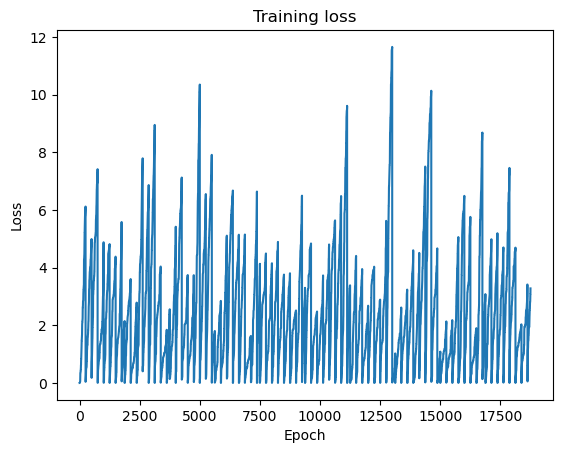

In [25]:
## YOUR CODE HERE ##
loss_for_plot = train()
plt.plot(loss_for_plot)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training loss")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [26]:
## YOUR CODE HERE ##
#I sourced the test function from my 2nd image classification project that I had submitted in the AI programming with Python Nanodegree.
def test():
    model.eval()
    model.to(device)
    with torch.no_grad():
            accuracy=0
            for images,labels in test_loader:
                images,labels=images.to(device),labels.to(device)
                log_ps=model.forward(images)
                ps=torch.exp(log_ps)
                
                equals=(labels.data==ps.max(dim=1)[1])
                accuracy+=equals.type_as(torch.FloatTensor()).mean().item()
    print('Accuracy: ',(accuracy/len(test_loader)))
    
test()

Accuracy:  0.99595


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##
#I could't actually much understand on what to actually do in this cell, because I am already getting an accuracy much above than what had been prescribed.

## Saving your model
Using `torch.save`, save your model for future loading.

In [17]:
## YOUR CODE HERE ##
torch.save(model.state_dict, 'checkpoint.pth')